In [1]:
import json
import os
import glob
import pprint

 
count = 0
answers_dict = {'narr_answers': []}
path = r'C:\\Users\\maganti\\Documents\\INFO 5502 Chen Sir Project UNT\\Web Scraping Interviews\\Narrators Json Files-With Q&A'
for filename in glob.glob(os.path.join(path, '*.json')): #only process .JSON files in folder.     
    #print(filename)
    narrators_answers_corpus = ""
    with open(filename, mode = 'rb') as currentFile:
        data = json.loads(currentFile.read())
        try:
            if data['transcript'] != {}:
                for segment in data["transcript"].keys():
                    for question in data["transcript"][segment]['Segment Q&A'].keys():
                        narrators_answers_corpus = narrators_answers_corpus + " " + data["transcript"][segment]['Segment Q&A'][question]
                        count = count + 1                
            else:
                pass
        except Exception as e:
            print(e)
            
    answers_dict['narr_answers'].append(narrators_answers_corpus) 

print()


In [2]:
import pandas as pd
df = pd.DataFrame(answers_dict)
df['narr_answers'] = df['narr_answers'].str.lower()
print(df['narr_answers'].shape)

(1042,)


In [3]:
df['narr_answers'] = df['narr_answers'].str.replace('[^a-zA-Z0-9 ]', '')

C:\Users\maganti\AppData\Local\Temp/ipykernel_42948/1017421635.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['narr_answers'] = df['narr_answers'].str.replace('[^a-zA-Z0-9 ]', '')


In [5]:
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import pandas as pd
import gensim
import re
import pyLDAvis#.gensim
import pyLDAvis.gensim_models
#from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [6]:
from stop_words import get_stop_words
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))

In [7]:
print((set(list(STOPWORDS)) | set(list(stop_words))))
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
print(type(list(STOPWORDS)))
print(type((stop_words)))
print(len(stopwords))

{'been', 'y', 'further', 'don', "mustn't", 'these', 'and', 'll', "wouldn't", "she's", 'which', 'being', 'all', "they'll", 'on', 'both', 'into', "why's", 'most', "doesn't", 'itself', 'couldn', 'an', "you're", 'would', 'how', "how's", "shouldn't", "we'd", 'does', 'by', 'its', 'myself', "that's", 'i', 'yourself', 'we', 'didn', 'wasn', 'could', 'themselves', 'shouldn', 'now', "let's", "they've", 'ought', "what's", "she'll", 're', 'between', 'at', 'won', 'than', 'she', "there's", "shan't", "couldn't", 'with', 'other', "wasn't", 'about', 'who', 'doesn', 'his', 'having', 'up', 'no', 'very', 'this', 'few', 'some', 'what', 'below', "haven't", 'too', 'her', 'had', 'each', 'own', 'until', "we're", 'ours', "when's", 'can', 'above', 'did', "isn't", "i'll", "won't", "we've", 'him', 'doing', 'me', 'such', 'why', 'nor', 'ma', 'haven', 'against', 'needn', "i'd", 'of', 'a', 'but', "can't", "you'd", 'from', 'if', "i'm", 'cannot', 'weren', 'down', 've', 'have', 'where', 'yourselves', "she'd", 'or', 'mustn

In [8]:
'''
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
'''
#stop_words = stopwords.words('english')
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]

In [9]:
len(stopwords)


211

In [10]:
df['clean_narr_answers'] = df['narr_answers'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [12]:
texts = []
lemmatizer = WordNetLemmatizer()
# loop through document list
for i in df['clean_narr_answers']:
    # clean and tokenize document string
    #raw = str(i[1]).lower()
    #tokens = tokenizer.tokenize(raw)
    tokens = i.split()
    # remove stop words from tokens
    #stop_words = stopwords.words('english')
    #stopped_tokens = [raw for raw in tokens if not raw in stop_words]
    
    # remove stop words from tokens
    #stopped_tokens_new = [raw for raw in stopped_tokens if not raw in remove_words]
    
    # lemmatize tokens
    
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # remove word containing only single char
    new_lemma_tokens = [raw for raw in lemma_tokens if not len(raw) == 1]
    
    lemmatized_string = " ".join(token for token in new_lemma_tokens)
    
    
    import nltk
    #word_data = "The best performance can bring in sky high success."
    nltk_tokens = nltk.word_tokenize(lemmatized_string)
    #print(list(nltk.bigrams(nltk_tokens)))
    texts.append([ele[0]+ " " + ele[1] for ele in list(nltk.bigrams(nltk_tokens))])

# sample data
#print(texts[8])

In [13]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [14]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=17, id2word = dictionary, passes=20)
import pprint
pprint.pprint(ldamodel.top_topics(corpus,topn=5))

[([(0.0017599323, 'jpn yeah'),
   (0.0010459757, 'eng yeah'),
   (0.00095675734, 'yeah jpn'),
   (0.00091849465, 'jpn yes'),
   (0.00063799665, 'yes jpn')],
  1.0420000412636637e-09),
 ([(0.00298937, 'high school'),
   (0.002573523, 'gon na'),
   (0.0017688781, 'came back'),
   (0.0016095599, 'thing like'),
   (0.001585687, 'japanese american')],
  -0.34094743048219117),
 ([(0.001233587, 'japanese american'),
   (0.00079804176, 'high school'),
   (0.00059451954, 'gon na'),
   (0.00046987343, 'united state'),
   (0.00046930774, 'thing like')],
  -0.3594742795738793),
 ([(0.00076763757, 'high school'),
   (0.000609936, 'japanese american'),
   (0.0003955036, 'san francisco'),
   (0.00031313, 'kind thing'),
   (0.00030143952, 'los angeles')],
  -0.7157598876365499),
 ([(2.7201146e-05, 'kamaboko white'),
   (2.7138492e-05, 'white fish'),
   (2.3001889e-05, 'frying pan'),
   (1.38397545e-05, 'think surprised'),
   (1.3839685e-05, 'get wholesale')],
  -0.9574983475144091),
 ([(0.0001438113, 

In [15]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -19.21752171036114

Coherence Score:  0.465868517246921


In [55]:
import pyLDAvis.gensim_models
#from pyLdAvis import gensim_models
# don't skip this
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
#pyLDAvis.show(vis)
pyLDAvis.display(vis)

C:\Users\maganti\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [56]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7532,"high school, gon na, came back, thing like, ja...","[name aaron, aaron zajic, zajic role, role fir..."
1,1,1.0,0.7538,"high school, gon na, came back, thing like, ja...","[born august, august 1924, 1924 sacramento, sa..."
2,2,1.0,0.5295,"high school, gon na, came back, thing like, ja...","[asian american, american action, action group..."
3,3,1.0,0.8463,"high school, gon na, came back, thing like, ja...","[family mean, mean father, father father, fath..."
4,4,1.0,0.8059,"high school, gon na, came back, thing like, ja...","[kamesuke yabiku, yabiku kama, kama yabiku, ya..."
5,5,1.0,0.6465,"high school, gon na, came back, thing like, ja...","[mother grew, grew kumamoto, kumamoto japan, j..."
6,6,1.0,0.9994,"high school, gon na, came back, thing like, ja...","[always parent, parent positive, positive alwa..."
7,7,1.0,0.9767,"high school, gon na, came back, thing like, ja...","[yes permission, permission father, father tsu..."
8,8,1.0,0.9391,"high school, gon na, came back, thing like, ja...","[war living, living family, family guess, gues..."
9,9,1.0,0.9389,"high school, gon na, came back, thing like, ja...","[farming uhhuh, uhhuh war, war farming, farmin..."


In [57]:
# Saving the above dataframe in a csv file.
df_dominant_topic.to_csv('17 Topics Summary.csv',index=False)

In [76]:
df_dominant_topic['Dominant_Topic'].value_counts()

1.0     891
0.0     100
5.0      15
7.0       9
2.0       6
3.0       5
14.0      4
8.0       3
11.0      2
9.0       2
10.0      1
16.0      1
13.0      1
12.0      1
6.0       1
Name: Dominant_Topic, dtype: int64

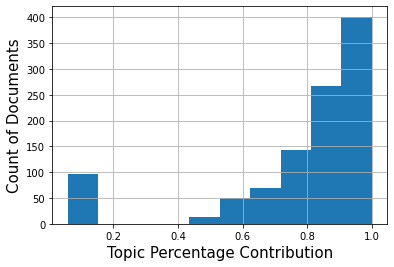

In [88]:
import matplotlib.pyplot as plt

df_dominant_topic['Topic_Perc_Contrib'].hist()
plt.xlabel("Topic Percentage Contribution", fontsize=15)
plt.ylabel("Count of Documents",fontsize=15)
plt.show()

In [93]:
print("The Percentage of documents that has topic contributions of less than 0.6 are ",round((df_dominant_topic[df_dominant_topic['Topic_Perc_Contrib'] < 0.6].shape[0])/ (df_dominant_topic.shape[0]), 2))

The Percentage of documents that has topic contributions of less than 0.6 are  0.14


In [71]:
ldamodel.top_topics(corpus,topn=10)

[([(0.0017599323, 'jpn yeah'),
   (0.0010459757, 'eng yeah'),
   (0.00095675734, 'yeah jpn'),
   (0.00091849465, 'jpn yes'),
   (0.00063799665, 'yes jpn'),
   (0.0005615151, 'yeah eng'),
   (0.00051051576, 'jpn jpn'),
   (0.00048504074, 'jpn oh'),
   (0.0003703031, 'jpn see'),
   (0.0003320403, 'see jpn')],
  1.0420000412636637e-09),
 ([(0.00298937, 'high school'),
   (0.002573523, 'gon na'),
   (0.0017688781, 'came back'),
   (0.0016095599, 'thing like'),
   (0.001585687, 'japanese american'),
   (0.0013810503, 'go back'),
   (0.0013526336, 'oh yeah'),
   (0.0012167974, 'little bit'),
   (0.0011892704, 'something like'),
   (0.0011685542, 'went back')],
  -0.31678029968711485),
 ([(0.00076763757, 'high school'),
   (0.000609936, 'japanese american'),
   (0.0003955036, 'san francisco'),
   (0.00031313, 'kind thing'),
   (0.00030143952, 'los angeles'),
   (0.00027374498, 'type thing'),
   (0.00027324693, 'little bit'),
   (0.0002658031, 'united state'),
   (0.0002597308, 'thing like'),


In [66]:
# extracting the 17 topics and saving in a csv file
df1 = df_dominant_topic[['Dominant_Topic', 'Keywords']].drop_duplicates()

In [70]:
df1.to_csv('17 Topics.csv',index=False)